## Final Project Submission

Please fill out:
* Student name: Lucas Fishbein
* Student pace: Flex Program
* Scheduled project review date/time: 1/23/23 10:00 AM
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@fishbeinlucas/an-analysis-of-a-few-factors-that-may-get-more-butts-in-the-movie-theaters-58b08c402093


# Project Overview 

### Project Objective

Microsoft is plannning to break into the movie delevepment space via  the formulation of their own proprietary movie studio. Microsoft, like most movie companies, is looking to maximize their success at the box office from the get-go. 

In order to maximize this likely-hood of success, an analysis of the top performing movies since 2010 has been completed in order to attempt to distill a few of the factors that have contributed to their success, allowing Microsoft to use this as a framework on which to develop their own movies and hopefully mimic the success.

### Analysis Overview

In order to obtain the relevant data to determine the success and the factors that may have contributed to that success for movies that have been released post 2010 two major movie databases were queried. 



### Determining the "Success" of a Movie

The success metric for this analysis is the Return on Investment or ROI. A "highly successful" movie will be any movie with an ROI >= 500%.

### Factors explored that may have contributed to a Movie's success

##### Genre

The genre of a movie tends to be the first descriptive piece used when describing a movie, therefore it is very possible that people choose what movies to see inpart by which genre it is. This analysis uses ROI and genre to find out what percentage of movies in each genre end up with a high level of success so we can therefore guide microsoft on which genres they should focus on.

##### Month Released

The movie viewing habits of the global population my change throughout the calendar year for a myriad of factors. This analysis compares the release month of movies with high levels of success with that of the larger database to determine what percentage of movies released in a given month reach high levels of success to therefore provide Microsoft with a recomendation on the time of year their movies should be released to maximize success likelihood. 

##### Production Budget

The production budget into a movie is another very important factor in the early steps of movie development as this will guide many, if not almost all of the factors of a movie moving forward. In order to determine what Microsoft initial investment should be to maximize ROI, an analysis of different ranges of production budgets vs their success at each level was completed to give microsoft an idea of how much they should budget for each movie to maximize ROI.



In [7]:
#Importing necessary Python Packages
import pandas as pd #Allows access to dataframes inside databases
import gzip #Allows access to .gz files in /zippedData 
import zipfile #Allows access to .zip file in /zippedData 
import sqlite3 #Allows access to IMDB SQLite database provided
import matplotlib.pyplot as plt #Creates Data visualizations
import matplotlib.ticker as mtick #Allows us to turn axis ticks into percentages
import seaborn as sns #Creates Data visualizations

## Data Sources

IMDB database (IMDB.com) which contains basic information regarding 146,144 different movie titles that have been released since 2010. 

The second data source quiered was from the_numbers.com, this database contains only 5,872 movies in total and 2,194 titles from 2010 and beyond, includes financial information that is a key to how we  determine the success of a movie.

When combining these two databases in order to form a new, complete database only of movies that contained all of the relevant information outlined below we end up with a sample size of 1,859. This is the dataset for the present analysis

The limitations regarding this dataset are covered in the README.DB. 

In [108]:
#Accessing the data files in the zippedData folder for futher use
tn_budgets = pd.read_csv(
    'Data/tn.movie_budgets.csv.gz', compression='gzip')

#extracting SQL database from zip file and store unarchived version in zippedData folder 
with zipfile.ZipFile(
    'Data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/')

#Connecting to the SQL database for inspection    
imdb_sql = sqlite3.connect(
    'Data/im.db')


## IMDB SQL database structure
![movie_data_erd](https://user-images.githubusercontent.com/117129342/212987003-c66623a3-831c-4881-a4e9-97ce26236a79.jpg)


In [109]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Data Preparation

## Data Cleaning and Creating additional Columns Prior to the Merge of the tn_budgets and imdb_sql databases


### Creating dataframe of relevant Info from relevant IMDB SQL tables

Using the SQL database structure map for the IMDB data, information was extracted from the movie_basics table as it provided a movie title, similar to the tn_budgets database as well as a release year through the "start_year" variable. While the tn_budgets database does not have a year column, we can extract this from the release_date column allowing us to merge these two databases on both the movie title and year. This is critical as it is very possible that movies of the same name exist but it is much lessl likely that movies of the same name that came out the same year exist. 

In [112]:
#Querying tables in IMDB SQL file in order to retreive the ratings for each movie
imdb_sql_query = """
SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title, 
    movie_basics.original_title, 
    movie_basics.start_year, 
    movie_basics.genres
FROM movie_basics 
"""

#creating a dataframe that conatins only the information needed in order to join the rt and tn tables
imdb_joined = pd.read_sql(imdb_sql_query, imdb_sql)



In [118]:
imdb_joined.sort_values('primary_title')[80:100]

,movie_id,primary_title,original_title,start_year,genres
114423,tt6767150,#ThisIsACoup,#ThisIsACoup,2015,Documentary
71049,tt4062604,#Thosegirls,#garotas: O Filme,2015,"Comedy,Drama"
2381,tt10240886,#Truth,#Truth,2019,Drama
110837,tt6467082,#TubeClash02,#TubeClash02,2016,"Animation,Comedy,Drama"
95788,tt5589314,#Twerkumentary,#Twerkumentary,2016,Documentary
117377,tt6992706,#UberXTaxis,#UberXTaxis,2017,Documentary
103825,tt6082646,#Uploading_Holocaust,#Uploading_Holocaust,2016,"Documentary,History"
65584,tt3743246,#Victoria,#Victoria,2018,"Action,Drama"
91501,tt5293858,#Walang Forever,#Walang Forever,2015,"Comedy,Romance"
114405,tt6765644,#WeRideWhy?,#WeRideWhy?,2020,Documentary


In [115]:
tn_budgets.sort_values('movie')[0:30]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5115,16,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0
3954,55,"Jul 17, 2009",(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060"
4253,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
3447,48,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
3262,63,"Mar 31, 1999",10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950"
350,51,"Mar 7, 2008","10,000 B.C.","$105,000,000","$94,784,201","$269,065,678"
505,6,"Nov 22, 2000",102 Dalmatians,"$85,000,000","$66,941,559","$66,941,559"
3931,32,"Aug 18, 2006",10th & Wolf,"$8,000,000","$54,702","$143,782"
4189,90,"Aug 12, 2005",11:14,"$6,000,000",$0,$0
5535,36,"Apr 13, 1957",12 Angry Men,"$340,000",$0,$0


Upon looking at a sample of both databases we can see that there are some possible discrepencies between how the same movie title string is written out which would cause issues when we merge based on the title. These descrepancies will be dealt with prior to the merge.

## Calculating the Return on Investment (ROI) 

This will be based on worldwide gross income and production cost being sourced from the tn_budgets

### General forumla to calculate ROI:

$$
ROI = \frac{\text{Net Income}}{\text{Cost of Invetment}} * 100
$$

### Formula to calculate a Movie's ROI:
$$
ROI = \frac{\text{Worldwide Gross Income}}{\text{Production Budget}} * 100
$$



### Calculating ROI, Creating an ROI column and formating the new ROI column into integer format using TN movie budgets database

In [11]:
#Converting columns from a currency formated object to float data type for calculation
tn_budgets[tn_budgets.columns[3:6]] = tn_budgets[
                                        tn_budgets.columns[3:6]].replace(
                                        '[\$,]', '', regex=True).astype(float)


#Calculating ROI using ROI formula above and adding an ROI column to dataframe
tn_budgets['ROI(%)'] = ((tn_budgets['worldwide_gross'] 
                        / tn_budgets['production_budget'])
                        * 100).astype(int) 


### Creating a Release year and month column from the release date column in order to use year as a merging value and the month as a analysis parameter

In [12]:
#Creating a year released column in the tn db in order to use during merge with imdb dataframe
tn_budgets['start_year'] = tn_budgets['release_date'].str[-4:].astype(int)

#Takes the first three characters of the release_date string and places it in the 
tn_budgets['release_month'] = [x[:3] for x in tn_budgets['release_date']]



### Fixing formating of Movie Titles in IMBD and TN databases prior to merge

There are a variety of ways two databases can have same movie name spelt out, to combat these differences that will effect out merge results, the next cell standarizes a few of those possibilities to attempt to make the titles of the same movies between the two dataframes match

In [13]:
#Creating a dictionary of replacements to remove possible movie title descrpancies between the two databases
to_replace = {'&': 'and',
              ',': '',
              '#': '',
              r'[^\w\s]+':'',
              '-':'',
              'â':'',
              "'":"",
              ':':'',
              r'rs\.': '',
              '  ':''
             }

#Making All title categories lower case and then completed replacements above
for k, v in to_replace.items():
    imdb_joined['primary_title'] = imdb_joined['primary_title'].str.lower().str.replace(k, v)
    imdb_joined['original_title'] = imdb_joined['original_title'].str.lower().str.replace(k, v)
    tn_budgets['movie'] = tn_budgets['movie'].str.lower().str.replace(k, v)
    
#Making tn_budgets year into integers to align with imdb year
tn_budgets['start_year'] = tn_budgets['start_year'].astype(int)

#Creating a dataframe only containing movies released after 2010 to remove unnecessary data
tn_after_2010 = tn_budgets[tn_budgets['start_year'] > 2009]


### Merging IMDB and TN databases based on movie titles and year of release

In [14]:
#discoved that the release date from the tn database was sometimes the video released date and not thearter release date, fixed this by adding a tolerance of 1 year to the year merge
imdb_tn_merge = pd.merge_asof(
                tn_after_2010.sort_values('start_year'),\
                imdb_joined.sort_values('start_year'),\
                left_by ='movie',right_by='primary_title',\
                on='start_year',\
                direction='nearest',\
                tolerance = 1)


In [15]:
#Create a dataframe of what was not successfully merged to investigate the reason on a case by case basis
not_merged = imdb_tn_merge[imdb_tn_merge['movie_id'].isna()]


In [16]:
#removing the rows were were not included in the merge to only keep rows with all relevant infomation present
imdb_tn_merge = imdb_tn_merge[imdb_tn_merge['movie_id'].notna()]

### Creating a data frame that only contains the movies of high success (an ROI of 500% or more)

In [17]:
#Taking only the movies with an ROI of 500% or Higher to create a dataframe only containing movie of high success
top_movies = imdb_tn_merge[imdb_tn_merge['ROI(%)'] >= 500] 



# Data Analysis

## Release Month Analysis

### Creating Bar Graph to show the success rates of each release month in our dataset
In order to determine which month Microsoft should release its new movies, we will determine which months have the highest rates of high success by comparing the highly successful movies to all of the movies in our dataset

<AxesSubplot:title={'center':'Percent of Movies released per Month that had RIO >= 500%'}, xlabel='Percentage that became Highly Successful', ylabel='Month of Original Release'>

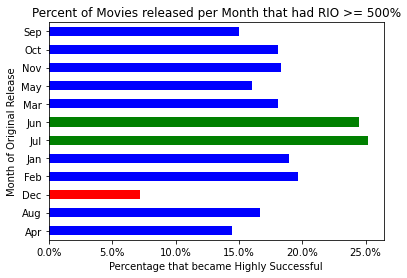

In [101]:
#Finding value counts for the months of release for the top movies and all movies in merged db
top_months = top_movies.release_month.value_counts()
all_months = imdb_tn_merge.release_month.value_counts()

#Calculating percentage of movies each month that became highly successful
months_bar_data = ((top_months / all_months) * 100)

#Create conditions to color graph bars based on their value
months_bar_colors = [{i<10: 'red', 10<=i<=23: 'blue', i>23: 'green'}[True] for i in months_bar_data]

#plotting the percent of movies released in a given month that ended up being a highly successfully 

months_bar = months_bar_data.plot(kind='barh', color = months_bar_colors)

#Setting Labels for Graph
months_bar.set_xlabel('Percentage that became Highly Successful')
months_bar.xaxis.set_major_formatter(mtick.PercentFormatter()) #Formats x axis as percents
months_bar.set_ylabel('Month of Original Release')
months_bar.set_title('Percent of Movies released per Month that had RIO >= 500%')
months_bar


From this analysis we can see that the two best performing months, in green, were June and July with both having about 24% of movies released that month becoming highly successful. Due to these results these months will be the release months that are suggested to Microsoft. 

We can also see that the poorest performing month was december so Microsoft will be suggested to avoid this month of release. 

From this analysis we do not have insight into why this is occurring or what factors may be effecting these results but nonetheless this information will be helping in providing microsoft with the best chance of success for their movies.

## Genre Analysis
### Creating Bar Graph to show the success rates of each genre in our dataset
In order to determine which genre Microsoft should focus on for its new movies, we will determine which genre have the highest rates of high success by comparing the highly successful movies to all of the movies in our dataset


In [19]:
#obtaining total number of occurences of each genre in entire merged dataset
all_movie_genre_count = imdb_tn_merge['genres'].str.split(
                        ',', expand=True).stack().value_counts()

#obtaining total number of occurences of each genre in the top movies
top_movie_genre_count = top_movies['genres'].str.split(
                        ',', expand=True).stack().value_counts()

#Dividing value counts of the genres of top movies by the value counts of the genres of all movies to get percentage per genre to be top movie
genre_percentage_data = (top_movie_genre_count/all_movie_genre_count) * 100


<AxesSubplot:title={'center':'Percent of Movies per Genre that had RIO >= 500%'}, xlabel='Percentage of Genre', ylabel='Genre'>

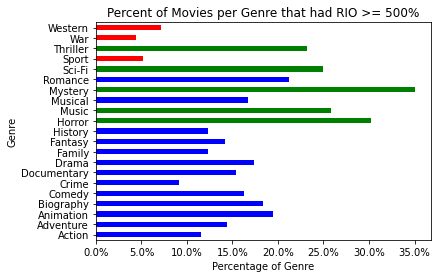

In [105]:
#Create conditions to color graph bars based on their value
genre_bar_colors = [{i<8: 'red', 8<=i<=23: 'blue', i>23: 'green'}[True] for i in genre_percentage_data]

#Create horizontal bar graph based on number occurences of each month
genres_bar = genre_percentage_data.plot(kind='barh', color = genre_bar_colors)

#Setting Labels for Graph
genres_bar.set_xlabel('Percentage of Genre')
genres_bar.xaxis.set_major_formatter(mtick.PercentFormatter()) #Formats x axis as percents
genres_bar.set_ylabel('Genre')
genres_bar.set_title('Percent of Movies per Genre that had RIO >= 500%')
genres_bar

The results of the genre data analysis have elicidated the best performing genres since 2010 and therefore will allow us to suggest which genres Microsoft should focus on in an attempt to obtain an ROI >= 500%.

These results show that the best performing genres were Mystery and Horror at over 30% of these movies obtaining an ROI >= 500%. It is also noteable that Music, Sci-Fi and Thriller were not far beyond all with over 23% of movies reaching our high success mark.

The poorest performing genres that should be avoided were war, sport and western movies all with less than 8% of filmds becoming highly successful.

## Production Budget Analysis

### Production Budget vs Worldwide Gross Income

Creating a Scatter Plot to represent how Production Budget and Worldwide Gross income are related  for all movies in database as well as just the highly successful movies 



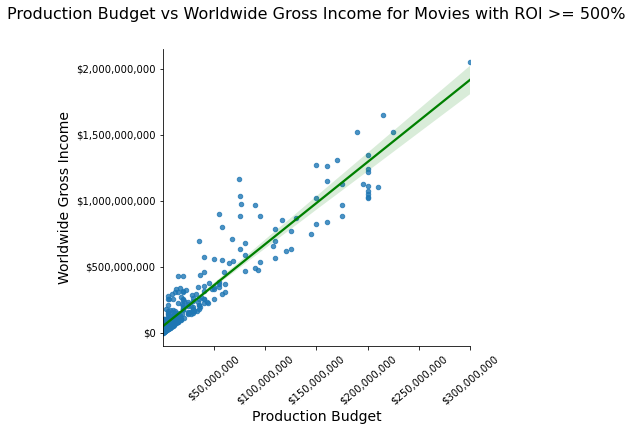

In [76]:
#Creating Top movies Scatter plot
top_wp_scat = sns.lmplot(y ='worldwide_gross',
                         x ='production_budget',
                         data= top_movies, fit_reg=True, 
                         scatter_kws={"marker": "D", "s": 20},
                         line_kws={'color': 'Green'})

#Set Axis labels
plt.title('Production Budget vs Worldwide Gross Income for Movies with ROI >= 500%', y=1.08, fontsize = 16)
plt.xlabel('Production Budget', fontsize = 14)
plt.ylabel('Worldwide Gross Income', fontsize = 14)

#Formatting Axis Ticks
#Y Axis Ticks
plt.ticklabel_format(style='plain', axis='y') #Puts y axis tick into standard form                    
for ax in top_wp_scat.axes.flat:  #Loop to place commas on the axis ticks
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
#X Axis Ticks   
plt.ticklabel_format(style='plain', axis='x') #Puts x axis tick into standard form                    
for ax in top_wp_scat.axes.flat:  #Loop to place commas on the axis ticks
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
plt.xticks(rotation=40) #Rotating x axis ticks for readability 

    
    
top_wp_scat

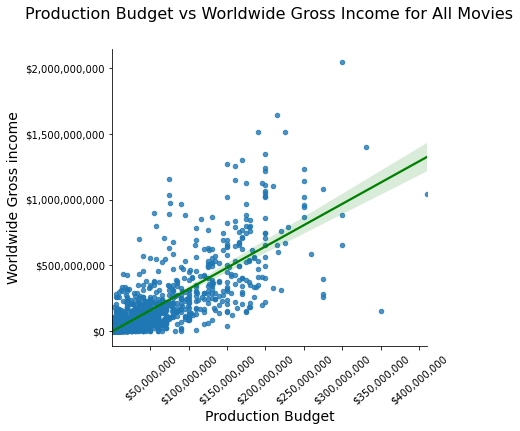

In [119]:
all_wp_scat = sns.lmplot(
                        y ='worldwide_gross',
                        x ='production_budget', 
                        data= imdb_tn_merge, 
                        fit_reg=True, 
                        scatter_kws={"marker": "D", "s": 20},
                        line_kws={'color': 'Green'})

#Set Axis labels
plt.title('Production Budget vs Worldwide Gross Income for All Movies', y=1.08, fontsize=16)
plt.xlabel('Production Budget', fontsize=14)
plt.ylabel('Worldwide Gross income', fontsize=14)

#Formatting Axis Ticks
#Y Axis Ticks
plt.ticklabel_format(style='plain', axis='y') #Puts y axis tick into standard form                    
for ax in all_wp_scat.axes.flat:  #Loop to place commas on the axis ticks
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
#X Axis Ticks   
plt.ticklabel_format(style='plain', axis='x') #Puts x axis tick into standard form                    
for ax in all_wp_scat.axes.flat:  #Loop to place commas on the axis ticks
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
plt.xticks(rotation=40) #Rotating x axis ticks for readability 

all_wp_scat

In both of these graphs of Worldwide Gross Income vs Production Budget it can be seen that there is a similar positive trend line, which can be interpreting as the more money input into a movies production the higher the worldwide gross. This logically, may lead to the conclusion that a good strategy to produce maximum income would be to input an infinite amount of money in the hope that would create an infinite worldwide gross income. This is obviously not how the real world works, so this analysis will not act as an action step that I will recommend to microsoft but rather use it to show a baseline understanding of how the movie industry works in regards to these factors.

What I do think is helpful from these graphs is the idea that on average movies of higher budgets tend to make more money globally, the reasons for this cannot be gauged via this dataset but I believe this provides a nice overview of how investment into a movie can lead to high profitability. In order to extract more useful information from this data, I will proceed by investigating the rate at which how movies within different price ranges met our goal of high success via an ROI >= 500%

### Production Budget vs ROI

#### Splitting dataframe by movie's production budget into multiple bins 

The Production budgets in this dataset range from \\$7,000 to over \\$410,000,000, in order to make sense of how these budgets may effect movie success rates the budgets were broken down into seven different ranges of budgets that represent different price categories that Microsoft will be able to focus on.


In [23]:
import re #Allows us to format axis ticks as desired

#Creating the X axis ticks labels
pb_scat_xticks = ['0 to 1 million', 
                  '1 Million to 5 Million',
                  '5 Million to 10 Million', 
                  '10 Million to 30 Million', 
                  '30 Million to 60 Million', 
                  '60 Million to 100 Million', 
                  '100 Million to 500 Million' ]

#Creating the bin limits in order to cut the production budgets data into specified categories 
pb_scat_bins = [0, 
                1000000, 
                5000000, 
                10000000, 
                30000000, 
                60000000, 
                100000000, 
                500000000]



#Cutting the database of all movies and the top movies' production budgets into bins designated above
all_pb_cut = pd.cut(imdb_tn_merge['production_budget'],
                    bins = pb_scat_bins, include_lowest=True)

top_pb_cut = pd.cut(top_movies['production_budget'], 
                    bins = pb_scat_bins, include_lowest=True)

#Derving the value counts for each of the production budgets bins
all_pb_cut_vc = all_pb_cut.value_counts()

top_pb_cut_vc = top_pb_cut.value_counts()

#Getting the percent of each production budget bin that became a top movie
pb_percentage = (top_pb_cut_vc/all_pb_cut_vc) * 100



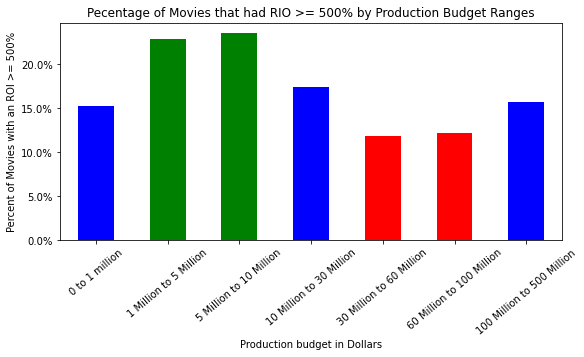

In [125]:
#Create conditions to color graph bars based on their value
pb_plot_colors = [{i<13: 'red', 13<=i<=20: 'blue', i>20: 'green'}[True] for i in pb_percentage]

#Plotting production budget percentage data created in previous cell
pb_plot = pb_percentage.plot.bar(rot=0, color=pb_plot_colors, figsize=(9,4))
pb_plot.set_xticklabels(pb_scat_xticks, rotation=40) 
pb_plot.set_title('Pecentage of Movies that had RIO >= 500% by Production Budget Ranges')
pb_plot.set_xlabel('Production budget in Dollars')
pb_plot.set_ylabel('Percent of Movies with an ROI >= 500%')
pb_plot.yaxis.set_major_formatter(mtick.PercentFormatter()) #Formats y axis as percents
plt.show()




From the results of this data analysis we can see that the movies with a production budget of between 1 million and 10 million dollars performed the best with about 23% of movies in these categories becoming highly successful, this would lead to the assumption that this is the best range for microsoft to focus on when producing their own movies.

It can also be seen that movies in the 30 million to 100 million dollar range perfirmed the poorest on average and this range should likely be avoided as they were the least likely to produce a strong ROI at only about 12% reaching our high success criteria. So this range should be avoided.

# Conclusions 

### The factors to include based on this analysis to maximize the chance of an ROI >= 500%:
Production Budget:
- Between One and Ten Million Dollars were top performer. 
- Avoid Thirty to One Hundred Million dollar range

Genre:
- Mystery and Horror were top performers. 
- Avoid War, Sport & Western

Release Month:
- June and July  were top performers. 
- Avoid December

# Next Steps

### The next steps to further investigate the task at hand is to address the limitations of this study in the following ways
**Data sources and database Size:** 
- Find a much larger database to use as the dataset for this analysis as 1859 movies may not be large enough to get reproducible results
- Be sure to fully understand how a database was formed and what the inclusion criteria for the database is

**Form a more complete picture of a movie's investment for ROI calculation:** 
- Find a database that includes other investment costs associated with a movie success such as the advertising budget and intellectual property licensing fees

**For a more complete picture of a movie's gross income for ROI calculation:**
- Find a database that includes other income sources beyond just the box office worldwide gross associated with a movie's income such as merchandise sales, intellectual property licensing fees, and post movie theater sales